<a href="https://colab.research.google.com/github/Cann-Emma/DS1002-zgb8ts/blob/main/notebooks/08-pandas-introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas

The data manipulation package of choice for Python users is Pandas. Pandas is built on top of NumPy and provides an efficient implementation of a DataFrame. DataFrames are essentially multidimensional arrays with attached row and column labels, and often with heterogeneous types and/or missing data. As well as offering a convenient storage interface for labeled data, Pandas implements a number of powerful data operations familiar to users of both database frameworks and spreadsheet programs.

Let's work through a sample data frame using the Pandas library. We'll start by importing the library and creating a data frame from the Titanic Passenger List.

These great examples are adapted from Giles McMullen-Klein's work.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
titanic_df = pd.read_excel('titanic3.xls', 'titanic3', index_col=None, na_values=['NA'])

In [6]:
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [17]:
titanic_df.median()

<ipython-input-17-d4c19f5b1a55>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_df.median()


pclass        3.0000
survived      0.0000
age          28.0000
sibsp         0.0000
parch         0.0000
fare         14.4542
body        155.0000
dtype: float64

In [7]:
titanic_df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [8]:
titanic_df.drop(['ticket','cabin','boat','body'],axis=1).head()

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"


In [9]:
# Finding Missing Values in Dataset
titanic_df.isnull()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1305,False,False,False,False,True,False,False,False,False,True,False,True,True,True
1306,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1307,False,False,False,False,False,False,False,False,False,True,False,True,True,True


In [10]:
# Sum Up missing values in each column
titanic_df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

<Axes: >

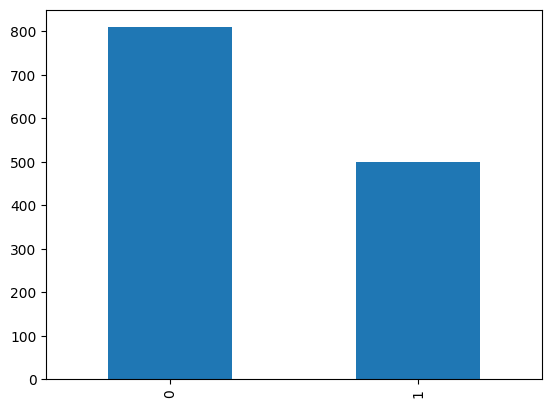

In [11]:
pd.value_counts(titanic_df['survived']).plot.bar()

In [12]:
titanic_df['survived'].mean()

0.3819709702062643

In [13]:
titanic_df.groupby(['sex','pclass'])['survived'].mean()

sex     pclass
female  1         0.965278
        2         0.886792
        3         0.490741
male    1         0.340782
        2         0.146199
        3         0.152130
Name: survived, dtype: float64

In [14]:
titanic_df['sex'].count()

1309

In [15]:
titanic_df[titanic_df['age']<18]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
53,1,0,"Carrau, Mr. Jose Pedro",male,17.0000,0,0,113059,47.1000,NaN,S,NaN,NaN,"Montevideo, Uruguay"
54,1,1,"Carter, Master. William Thornton II",male,11.0000,1,2,113760,120.0000,B96 B98,S,4,NaN,"Bryn Mawr, PA"
55,1,1,"Carter, Miss. Lucile Polk",female,14.0000,1,2,113760,120.0000,B96 B98,S,4,NaN,"Bryn Mawr, PA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,3,0,"Van Impe, Miss. Catharina",female,10.0000,0,2,345773,24.1500,NaN,S,NaN,NaN,NaN
1275,3,0,"Vander Planke, Mr. Leo Edmondus",male,16.0000,2,0,345764,18.0000,NaN,S,NaN,NaN,NaN
1279,3,0,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0000,0,0,350406,7.8542,NaN,S,NaN,NaN,NaN
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0000,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN


## Time-Series Data

Use pandas to look at stock values over time from a remote API.

In [16]:
zzzfPMjA7GsZUuyUpK7n_n7zzz

NameError: ignored

In [ ]:
!pip install quandl
import quandl
quandl.ApiConfig.api_key = ''
google = quandl.get('WIKI/GOOGL')
fb = quandl.get('WIKI/FB')

In [ ]:
%matplotlib inline
google.head()

In [ ]:
google['Adj. Close'].plot()

In [ ]:
fb.head()

In [ ]:
fb['Adj. Close'].plot()

In [ ]:
fb['Volume'].plot()

In [ ]:
google.index

In [ ]:
google['2004']['Adj. Close'].plot()